### Development and Implementation of AI for Moderating the CONSUL Platform

# Argument Clustering

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Example dataset of comments (expanded dataset)
comments = [
    "I support the new park construction.",
    "The new park is a waste of money.",
    "We need better public transportation.",
    "Public transportation improvements are necessary.",
    "The park will provide a green space for families.",
    "Investing in public transit will reduce traffic.",
    "I believe the park project is beneficial for the community.",
    "More buses and trains are essential for the city.",
    "Green spaces are important for mental health.",
    "Public transportation needs more funding.",
    "The park will attract tourists.",
    "Better public transport can improve air quality.",
    "Park construction is a long-term investment.",
    "Public transport infrastructure needs upgrading.",
    "The park project is too expensive.",
    "More funds should be allocated to public transportation.",
    "The new park will be a waste of resources.",
    "Improved transportation will benefit everyone.",
    "We should prioritize public transit over parks.",
    "A new park will enhance the city's image."
]

# Vectorizing comments
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Clustering comments
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Clustering results
clusters = kmeans.labels_
comments_df = pd.DataFrame({'comment': comments, 'cluster': clusters})
print(comments_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                              comment  cluster
0                I support the new park construction.        0
1                   The new park is a waste of money.        0
2               We need better public transportation.        2
3   Public transportation improvements are necessary.        2
4   The park will provide a green space for families.        0
5    Investing in public transit will reduce traffic.        1
6   I believe the park project is beneficial for t...        0
7   More buses and trains are essential for the city.        0
8       Green spaces are important for mental health.        0
9           Public transportation needs more funding.        2
10                    The park will attract tourists.        0
11   Better public transport can improve air quality.        2
12       Park construction is a long-term investment.        0
13   Public transport infrastructure needs upgrading.        2
14                 The park project is too expensive.  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


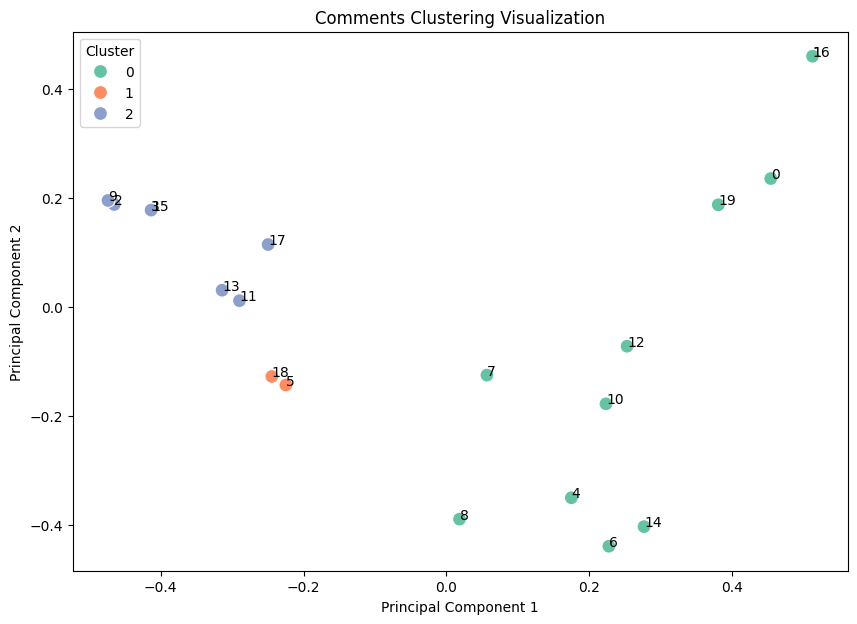

In [1]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

# Example dataset of comments (expanded dataset)
comments = [
    "I support the new park construction.",
    "The new park is a waste of money.",
    "We need better public transportation.",
    "Public transportation improvements are necessary.",
    "The park will provide a green space for families.",
    "Investing in public transit will reduce traffic.",
    "I believe the park project is beneficial for the community.",
    "More buses and trains are essential for the city.",
    "Green spaces are important for mental health.",
    "Public transportation needs more funding.",
    "The park will attract tourists.",
    "Better public transport can improve air quality.",
    "Park construction is a long-term investment.",
    "Public transport infrastructure needs upgrading.",
    "The park project is too expensive.",
    "More funds should be allocated to public transportation.",
    "The new park will be a waste of resources.",
    "Improved transportation will benefit everyone.",
    "We should prioritize public transit over parks.",
    "A new park will enhance the city's image."
]

# Vectorizing comments
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Clustering comments
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Clustering results
clusters = kmeans.labels_
comments_df = pd.DataFrame({'comment': comments, 'cluster': clusters})

# PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# Creating a DataFrame with PCA results and clusters
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = clusters
pca_df['comment'] = comments

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='cluster', palette='Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df.principal_component_1[i], pca_df.principal_component_2[i], str(i))
plt.title('Comments Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


<ipython-input-8-a65768c75d70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=comments_df, palette='Set2')


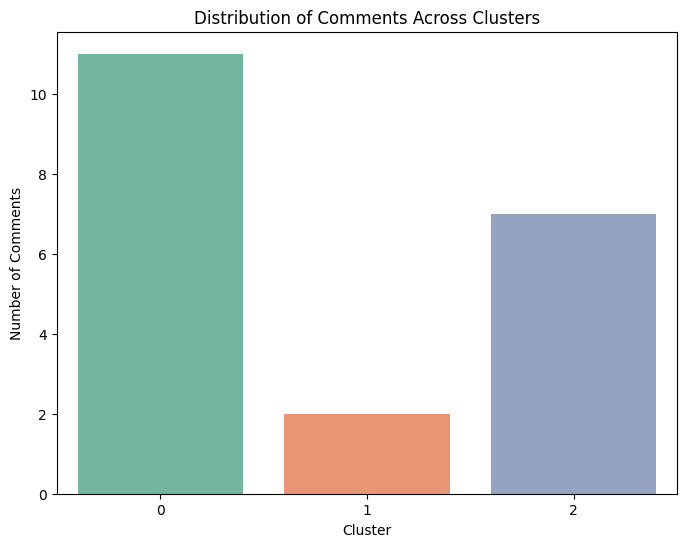

In [8]:
# Plot 1: Distribution of Comments Across Clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=comments_df, palette='Set2')
plt.title('Distribution of Comments Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Comments')
plt.show()

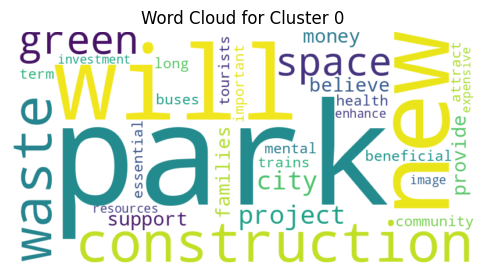

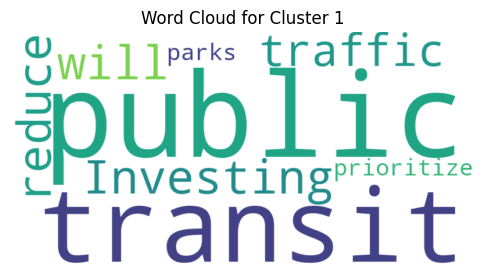

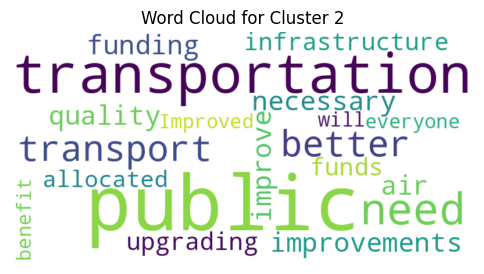

In [10]:
# Plot 2: Word Cloud for Each Cluster
from wordcloud import WordCloud

for cluster in range(num_clusters):
    cluster_comments = ' '.join(comments_df[comments_df['cluster'] == cluster]['comment'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_comments)

    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

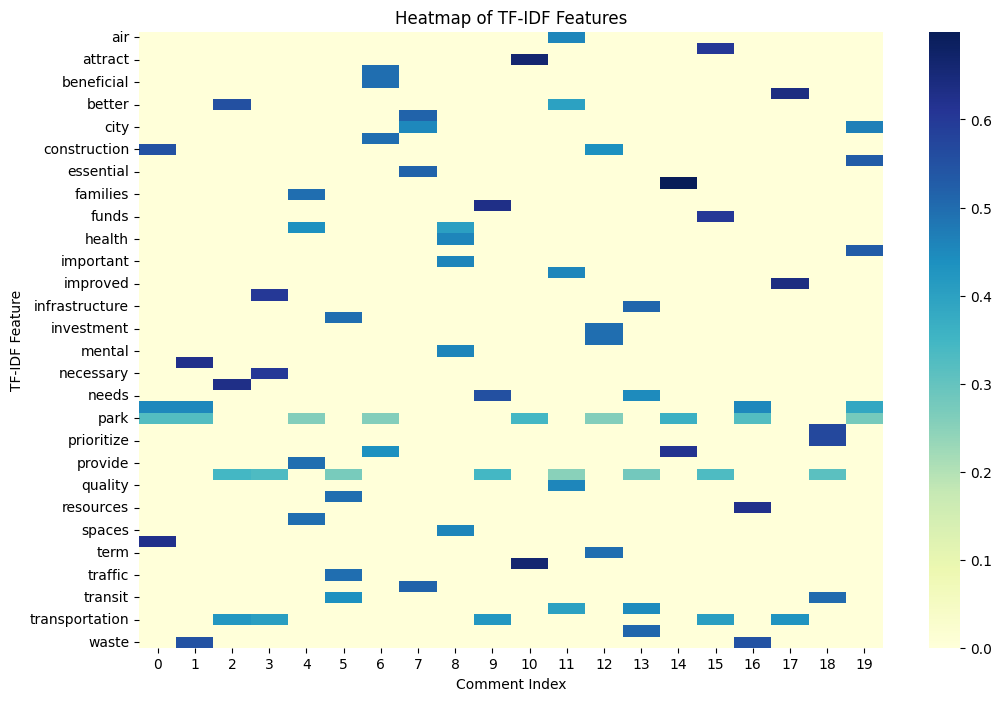

In [11]:
# Plot 3: Heatmap of TF-IDF Features
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.T, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of TF-IDF Features')
plt.xlabel('Comment Index')
plt.ylabel('TF-IDF Feature')
plt.show()

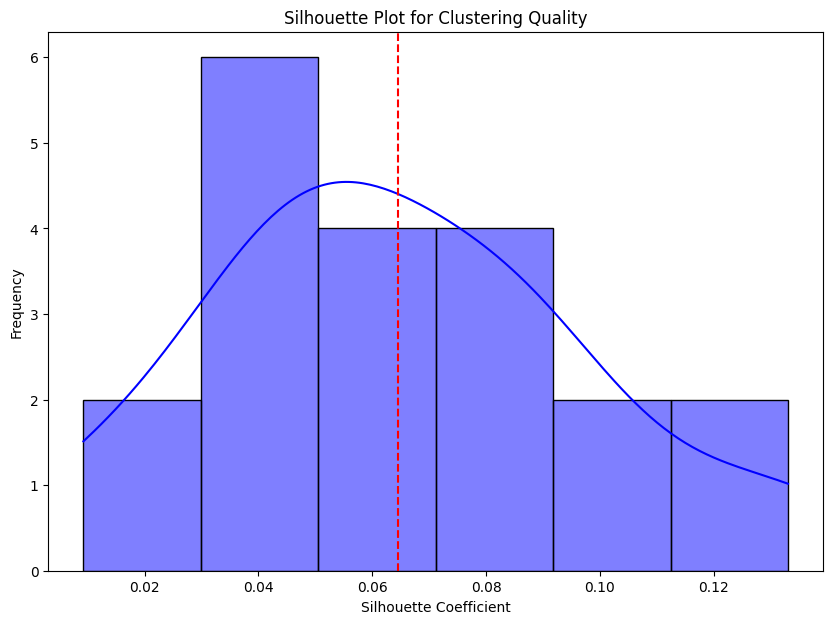

In [13]:
# Plot 4: Silhouette Plot for Clustering Quality
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X, clusters)
silhouette_avg = silhouette_score(X, clusters)

plt.figure(figsize=(10, 7))
sns.histplot(silhouette_vals, kde=True, color='blue')
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Plot for Clustering Quality')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.show()

# Automatic Summarization

In [3]:
from transformers import pipeline

# Using a pre-trained model for summarization
summarizer = pipeline("summarization")

# Example discussion topic (expanded text)
discussion_topic = """
The new park construction project has sparked a lot of debate. Supporters argue that it will provide a much-needed green space for recreation and improve the quality of life. However, opponents claim that the funds could be better spent on public transportation improvements, which are essential for the city's growth and sustainability. Additional arguments include the potential for increased tourism and long-term investment benefits versus the immediate need for improved transit infrastructure to reduce traffic and improve air quality.
"""

# Summarizing the topic
summary = summarizer(discussion_topic, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Supporters argue that it will provide a much-needed green space for recreation and improve the quality of life . Opponents claim that the funds could be better spent on public transportation improvements . Additional arguments include the potential for increased tourism and long-


Stimulating Discussions

In [7]:
from transformers import pipeline

# Using a smaller pre-trained model for question generation
question_generator = pipeline("text-generation", model="distilgpt2")

# Example analysis of current discussions
current_discussions = """
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.
"""

# Generating questions
questions = question_generator(current_discussions, max_length=50, num_return_sequences=3)
for i, question in enumerate(questions):
    print(f"Question {i+1}: {question['generated_text']}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question 1: 
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.


The
Question 2: 
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.




Question 3: 
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.






Identification and Filtering of Toxic Comments

In [ ]:
from transformers import pipeline

# Using a pre-trained model for toxicity detection
toxicity_classifier = pipeline("text-classification", model="unitary/toxic-bert")

# Example comments (expanded dataset)
comments = [
    "I support the new park construction.",
    "This is a stupid idea!",
    "The park project is idiotic and wasteful.",
    "Public transportation improvements are necessary.",
    "Why are we wasting money on this park?",
    "Public transit is a joke in this city.",
    "We need better leadership, not more parks.",
    "The park is a great idea and will help the community.",
    "Anyone who opposes this park is short-sighted.",
    "Better public transport can improve air quality."
]

# Checking comments for toxicity
results = toxicity_classifier(comments)
for comment, result in zip(comments, results):
    print(f"Comment: {comment} - Toxicity: {result['label']} - Score: {result['score']}")


Explainability of AI Decisions

In [4]:
!pip install lime

Intercept 0.33443238259590824
Prediction_local [1.00401151]
Right: 1.0


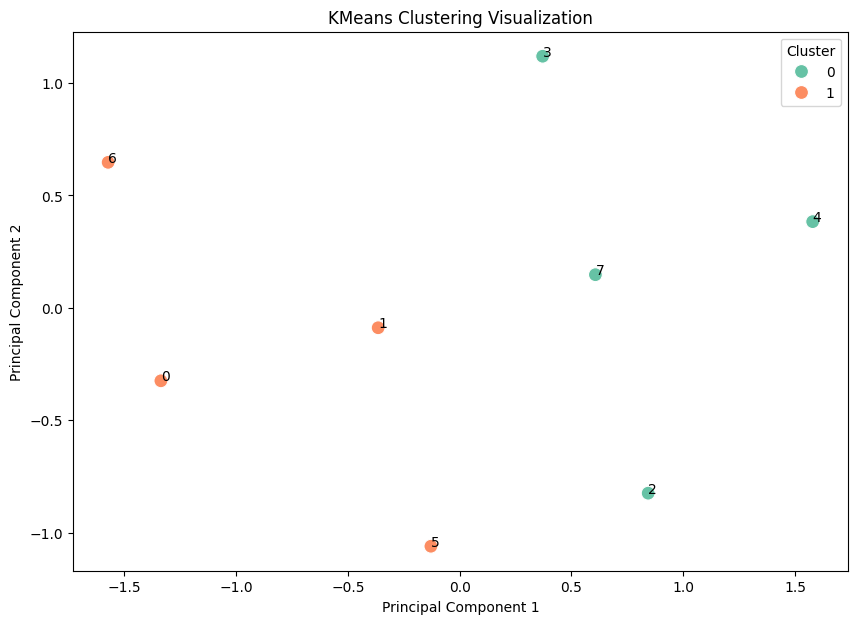

In [6]:
import lime
import lime.lime_tabular
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Example data and model
X_train = np.array([[0, 1], [1, 1], [2, 0], [2, 2], [3, 1], [1, 0], [0, 2], [2, 1]])
y_train = np.array([0, 1, 0, 1, 1, 0, 0, 1])
model = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_train)

# Custom prediction function to simulate probability scores
def predict_fn(data):
    cluster_assignments = model.predict(data)
    # Simulate probability scores with 1 for the assigned cluster and 0 for the others
    probabilities = np.zeros((data.shape[0], model.n_clusters))
    for i, cluster in enumerate(cluster_assignments):
        probabilities[i, cluster] = 1
    return probabilities

# Explaining predictions
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=['Feature 1', 'Feature 2'], class_names=[f'Cluster {i}' for i in range(model.n_clusters)], verbose=True, mode='classification')
instance = np.array([1, 2])
explanation = explainer.explain_instance(instance, predict_fn)
explanation.show_in_notebook()

# Plotting the clusters for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = model.labels_

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df.PC1[i], pca_df.PC2[i], str(i))
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
